In [4]:
#llamamos las librerias que necesitaremos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [5]:
#cargamos y leemos los datos en dataframe
df_titanic = pd.read_csv("train.csv")

In [6]:
#visualizamos la cabezera de los datos.
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#obtenemos informacion del dataset cargado
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#Estadistica basica de las columna
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


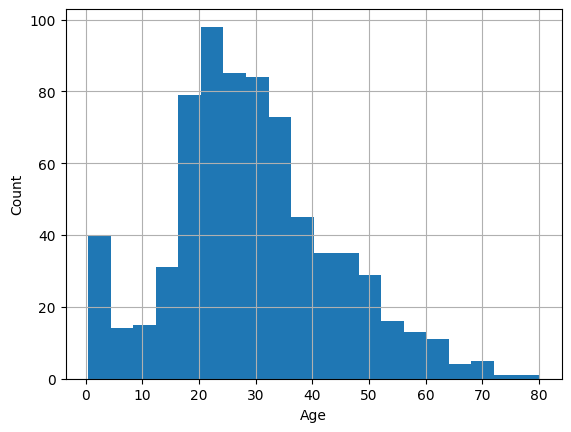

In [9]:
#Edad de pasajeros 
df_titanic["Age"].hist(bins=20)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

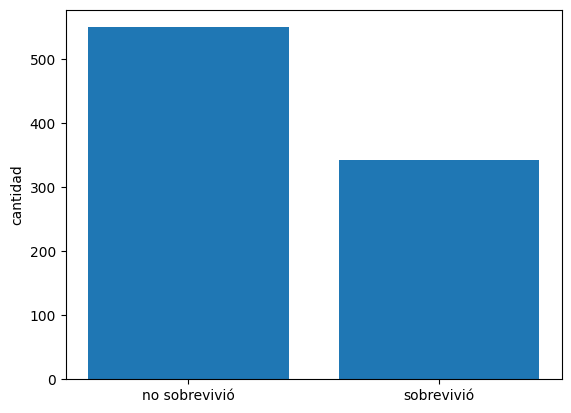

In [10]:
#personas que sobrevivieron y los que no
cantidad_sobreviviente = df_titanic["Survived"].value_counts()
plt.bar(cantidad_sobreviviente.index,cantidad_sobreviviente.values)
plt.xticks([0,1],["no sobrevivió","sobrevivió"])
plt.ylabel("cantidad")
plt.show()

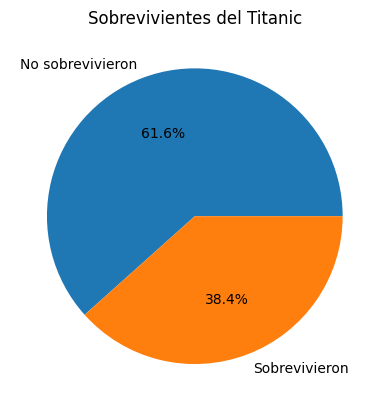

In [11]:

#Cantidad de personas que sobrevivieron mediante diagrama circular mostrado en procentaje
fig, ax = plt.subplots()
ax.pie(cantidad_sobreviviente, labels=['No sobrevivieron', 'Sobrevivieron'], autopct='%1.1f%%')

# Añade un título al gráfico
ax.set_title('Sobrevivientes del Titanic')

# Muestra el gráfico
plt.show()


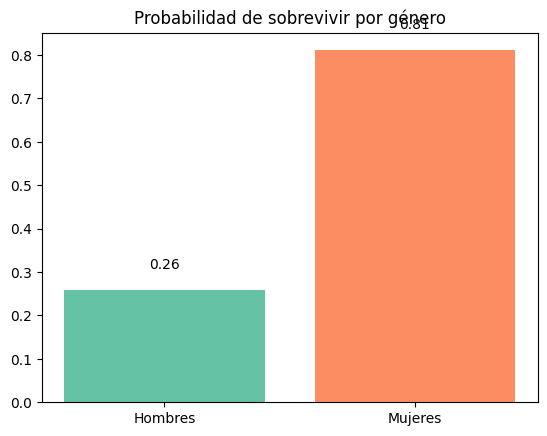

In [12]:
# Agrupa los datos por el campo 'Sex' y cuenta la cantidad de personas que sobrevivieron y las que no en cada grupo
survived_by_sex = df_titanic.groupby(['Sex', 'Survived']).size().unstack()

# Calcula las probabilidades de sobrevivir por género
survival_probabilities = survived_by_sex[0] / survived_by_sex.sum(axis=1)

# Crea una figura con un solo eje
fig, ax = plt.subplots()

# Crea un diagrama de barras que muestra la probabilidad de sobrevivir por género
labels = ['Hombres', 'Mujeres']
colors = ['#66c2a5', '#fc8d62']
ax.bar(labels, survival_probabilities, color=colors)

# Añade un título al gráfico
ax.set_title('Probabilidad de sobrevivir por género')

# Añade etiquetas a las barras que muestran la probabilidad de sobrevivir
for i, v in enumerate(survival_probabilities):
    ax.text(i, v+0.05, f"{v:.2f}", ha='center')

# Muestra el gráfico
plt.show()

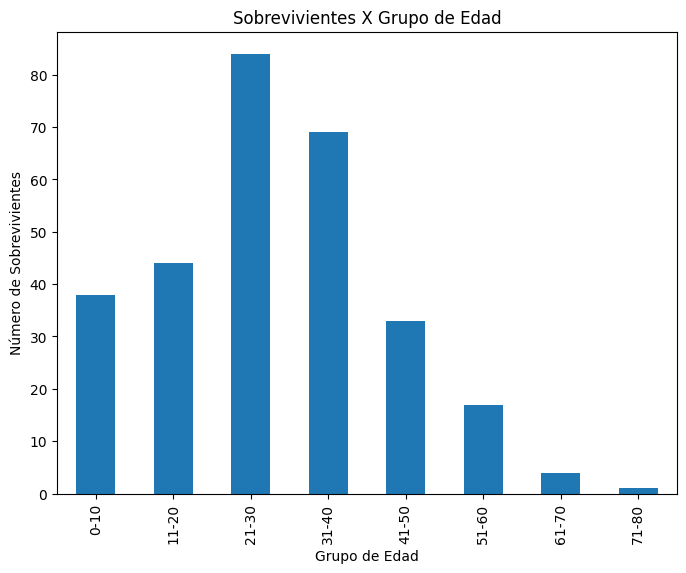

In [16]:
# Crear una copia del DataFrame filtrado
survived_df = df_titanic[df_titanic['Survived'] == 1].copy()

# Crear grupos de edad
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

# Utilizar .loc para realizar la asignación
survived_df.loc[:, 'AgeGroup'] = pd.cut(survived_df['Age'], bins=bins, labels=labels)

# Contar la cantidad de supervivientes por grupo de edad
age_group_counts = survived_df['AgeGroup'].value_counts().sort_index()

# Visualizar los resultados
age_group_counts.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Grupo de Edad')
plt.ylabel('Número de Sobrevivientes')
plt.title('Sobrevivientes X Grupo de Edad')
plt.show()


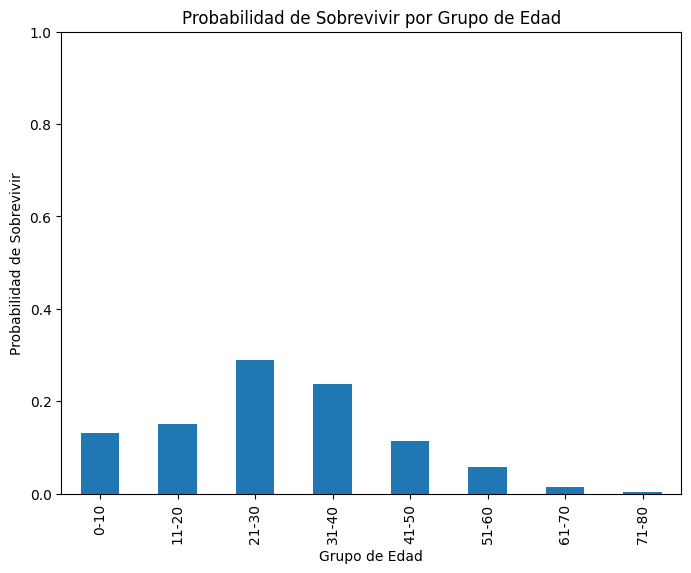

In [19]:
# Calcular la probabilidad de sobrevivir por grupos de edad
age_group_prob = survived_df['AgeGroup'].value_counts(normalize=True).sort_index()

# Visualizar los resultados con etiquetas en español
age_group_prob.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Grupo de Edad')
plt.ylabel('Probabilidad de Sobrevivir')
plt.title('Probabilidad de Sobrevivir por Grupo de Edad')
plt.ylim(0, 1)  # Establecer el rango del eje y de 0 a 1
plt.show()

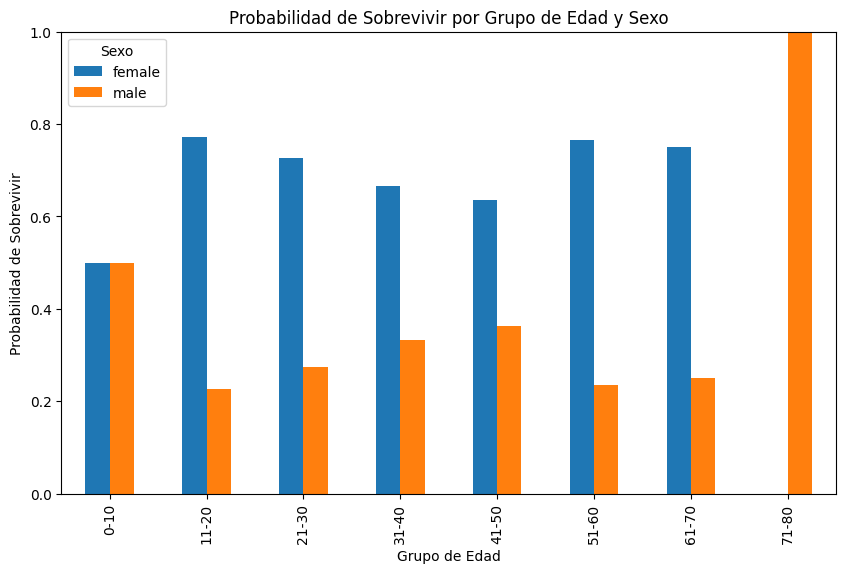

In [21]:
# Calcular la probabilidad de sobrevivir por grupos de edad y sexo
age_sex_group_prob = survived_df.groupby(['AgeGroup', 'Sex']).size() / survived_df.groupby('AgeGroup').size()

# Reformatear los datos para el gráfico
age_sex_group_prob = age_sex_group_prob.unstack()

# Visualizar los resultados con etiquetas en español
age_sex_group_prob.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Grupo de Edad')
plt.ylabel('Probabilidad de Sobrevivir')
plt.title('Probabilidad de Sobrevivir por Grupo de Edad y Sexo')
plt.legend(title='Sexo', loc='upper left')
plt.ylim(0, 1)  # Establecer el rango del eje y de 0 a 1
plt.show()
